In [231]:
####1
import numpy as np
import pandas as pd
df = pd.read_excel('/Users/lubna/Desktop/Online Retail.xlsx')
print(df)

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  
0      

In [233]:

print(df.isnull().sum())
print(df.describe())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64
            Quantity                    InvoiceDate      UnitPrice  \
count  541909.000000                         541909  541909.000000   
mean        9.552250  2011-07-04 13:34:57.156386048       4.611114   
min    -80995.000000            2010-12-01 08:26:00  -11062.060000   
25%         1.000000            2011-03-28 11:34:00       1.250000   
50%         3.000000            2011-07-19 17:17:00       2.080000   
75%        10.000000            2011-10-19 11:27:00       4.130000   
max     80995.000000            2011-12-09 12:50:00   38970.000000   
std       218.081158                            NaN      96.759853   

          CustomerID  
count  406829.000000  
mean    15287.690570  
min     12346.000000  
25%     13953.000000  
50%     15152.000000  
75%     16791.000000  
max     18287.00000

In [235]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
imputed_data = imputer.fit_transform(df["Description"].values.reshape(-1, 1))
df.iloc[:, df.columns.get_loc("Description")] = imputed_data
df.dropna(subset=['CustomerID'], inplace=True)
if 'InvoiceDate' in df.columns:
    df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])



In [237]:
df = df.drop_duplicates()
df= df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]
df['CustomerID'] = df['CustomerID'].astype('int64')
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [239]:
# Get numerical columns
numerical_columns = df.select_dtypes(include=np.number).columns

# Iterate over each numerical column to detect and handle outliers
for column in numerical_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Filtering Values between Q1-1.5IQR and Q3+1.5IQR
    df = df[(df[column] >= Q1 - 1.5 * IQR) & (df[column] <= Q3 + 1.5 * IQR)]


In [241]:
print(df.dtypes)

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int64
Country                object
TotalPrice            float64
dtype: object


In [243]:
df = df.loc[:, ~df.columns.duplicated()]

print(df.head())
df

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  
0 2010-12-01 08:26:00       2.55       17850  United Kingdom       15.30  
1 2010-12-01 08:26:00       3.39       17850  United Kingdom       20.34  
2 2010-12-01 08:26:00       2.75       17850  United Kingdom       22.00  
3 2010-12-01 08:26:00       3.39       17850  United Kingdom       20.34  
4 2010-12-01 08:26:00       3.39       17850  United Kingdom       20.34  


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60


In [245]:
########2

customer_summary = df.groupby('CustomerID').agg({
    'TotalPrice': 'sum',         # إجمالي الإنفاق لكل عميل
    'InvoiceNo': 'nunique',      # عدد الفواتير الفريدة لكل عميل
    'Quantity': 'sum',
    'Country' :'first'
         # إجمالي الكمية المشتراة لكل عميل
}).rename(columns={
    'TotalPrice': 'TotalSpending',
    'InvoiceNo': 'OrderFrequency',
    'Quantity': 'TotalQuantity',
    'Country':'city'
})

customer_summary['AvgBasketSize'] = customer_summary['TotalSpending'] / customer_summary['OrderFrequency']
customer_summary.head()

,TotalSpending,OrderFrequency,TotalQuantity,city,AvgBasketSize
CustomerID,,,,,
12347,2783.37,7,1701,Iceland,397.624286
12348,90.20,3,140,Finland,30.066667
12349,939.75,1,511,Italy,939.750000
12350,294.40,1,196,Norway,294.400000
12352,1130.94,7,500,Norway,161.562857


In [247]:
current_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
recency = df.groupby('CustomerID')['InvoiceDate'].max().reset_index()
recency.columns = ['CustomerID', 'LastPurchaseDate']
recency['Recency'] = (current_date - recency['LastPurchaseDate']).dt.days
customer_summary = customer_summary.merge(recency[['CustomerID', 'Recency']], on='CustomerID')
customer_summary
customer_summary.to_csv('Customer_Summary.csv', index=False)
print(customer_summary.head())

   CustomerID  TotalSpending  OrderFrequency  TotalQuantity     city  \
0       12347        2783.37               7           1701  Iceland   
1       12348          90.20               3            140  Finland   
2       12349         939.75               1            511    Italy   
3       12350         294.40               1            196   Norway   
4       12352        1130.94               7            500   Norway   

   AvgBasketSize  Recency  
0     397.624286        2  
1      30.066667      249  
2     939.750000       19  
3     294.400000      310  
4     161.562857       36  


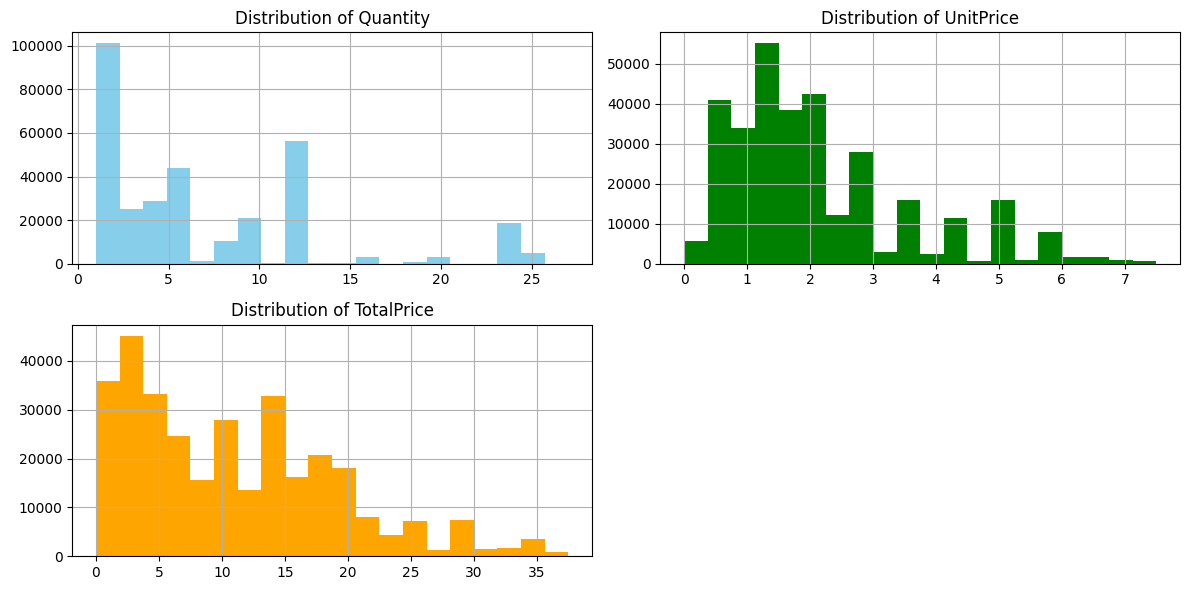

In [249]:
import matplotlib.pyplot as plt

# Plot histograms of key numeric features
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
df['Quantity'].hist(bins=20, color='skyblue')
plt.title('Distribution of Quantity')

plt.subplot(2, 2, 2)
df['UnitPrice'].hist(bins=20, color='green')
plt.title('Distribution of UnitPrice')

plt.subplot(2, 2, 3)
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df['TotalPrice'].hist(bins=20, color='orange')
plt.title('Distribution of TotalPrice')

plt.tight_layout()
plt.show()



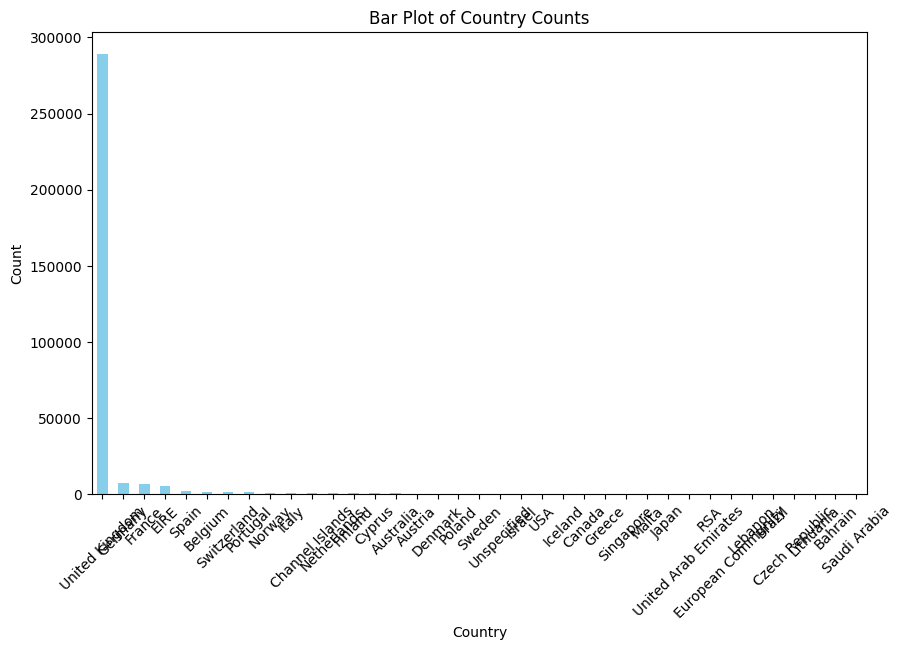

In [251]:
# Analyze categorical variables if present
#categorical_columns = df.select_dtypes(include=['object']).columns
#for col in categorical_columns:

import matplotlib.pyplot as plt

# Assuming 'Country' is a column name in your DataFrame 'df'
plt.figure(figsize=(10, 6))
df['Country'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Bar Plot of Country Counts')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


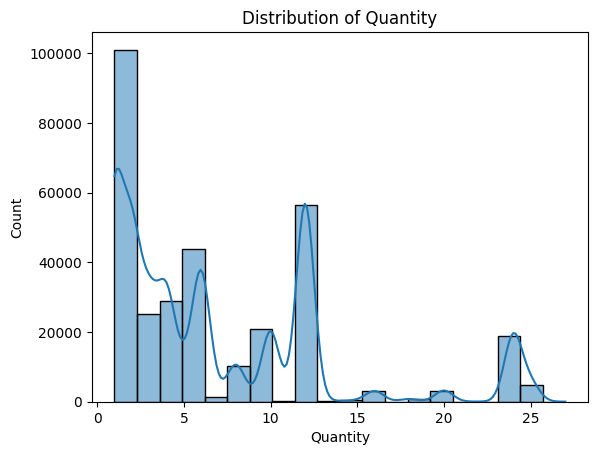

In [252]:
import seaborn as sns

sns.histplot(df['Quantity'], bins=20, kde=True)
plt.title('Distribution of Quantity')
plt.show()


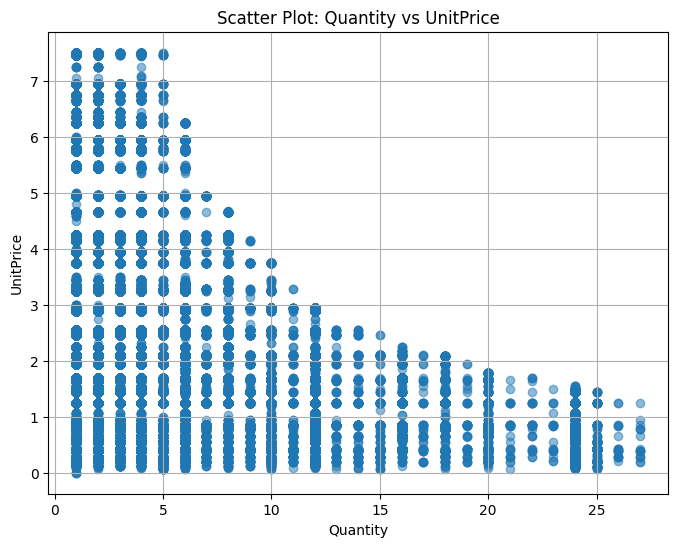

In [254]:
# Scatter plots
plt.figure(figsize=(8, 6))
plt.scatter(df['Quantity'], df['UnitPrice'], alpha=0.5)
plt.title('Scatter Plot: Quantity vs UnitPrice')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.grid(True)
plt.show()


In [257]:

customer_summary.to_csv('Customer_Summary.csv', index=False)
print(customer_summary.head())

   CustomerID  TotalSpending  OrderFrequency  TotalQuantity     city  \
0       12347        2783.37               7           1701  Iceland   
1       12348          90.20               3            140  Finland   
2       12349         939.75               1            511    Italy   
3       12350         294.40               1            196   Norway   
4       12352        1130.94               7            500   Norway   

   AvgBasketSize  Recency  
0     397.624286        2  
1      30.066667      249  
2     939.750000       19  
3     294.400000      310  
4     161.562857       36  


In [259]:
#####4
from sklearn.preprocessing import StandardScaler

# Assuming customer_summary is your DataFrame
# Select the numerical columns for scaling
numerical_cols = ['TotalSpending', 'OrderFrequency', 'TotalQuantity', 'AvgBasketSize', 'Recency']

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the numerical data and transform it
customer_summary[numerical_cols] = scaler.fit_transform(customer_summary[numerical_cols])
customer_summary

,CustomerID,TotalSpending,OrderFrequency,TotalQuantity,city,AvgBasketSize,Recency
0,12347,1.100100,0.452331,1.008419,Iceland,0.982884,-0.911778
1,12348,-0.428801,-0.134775,-0.360265,Finland,-1.018093,1.558125
2,12349,0.053485,-0.428328,-0.034972,Italy,3.934207,-0.741785
3,12350,-0.312878,-0.428328,-0.311164,Norway,0.420933,2.168101
4,12352,0.162023,0.452331,-0.044617,Norway,-0.302230,-0.571791
...,...,...,...,...,...,...,...
4141,18280,-0.402233,-0.428328,-0.447945,United Kingdom,-0.435950,1.848114
4142,18281,-0.453371,-0.428328,-0.437423,United Kingdom,-0.926344,0.878152
4143,18282,-0.415784,-0.281552,-0.438300,United Kingdom,-0.873836,-0.851780
4144,18283,0.656877,1.773319,0.703293,United Kingdom,-0.500383,-0.891779


In [261]:
customer_summary.to_csv('Customer_Summary_Processed.csv', index=False)
import pandas as pd

# Load your data
customer_summary = pd.read_csv('Customer_Summary.csv')

# Assuming 'CustomerID' is your target
print(customer_summary['CustomerID'].unique())


[12347 12348 12349 ... 18282 18283 18287]


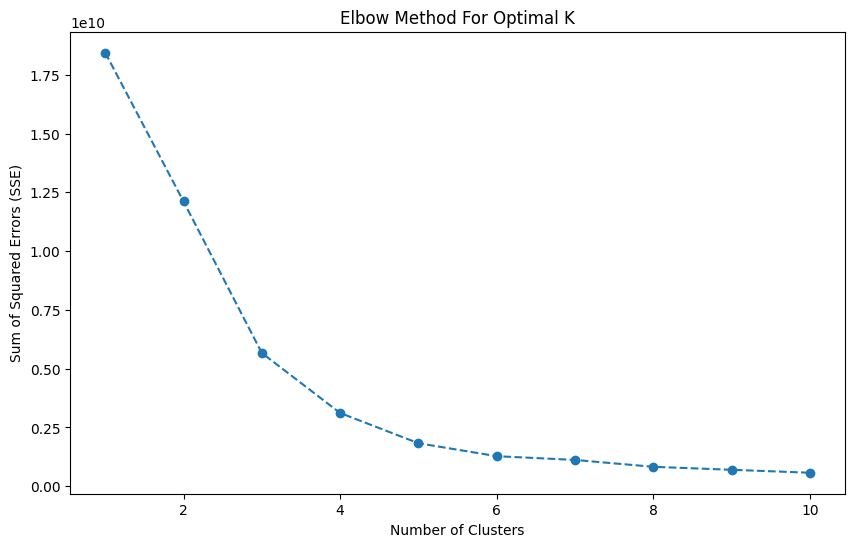

In [263]:
from sklearn.cluster import KMeans
import numpy as np
X = customer_summary[['TotalSpending', 'OrderFrequency', 'TotalQuantity', 'AvgBasketSize', 'Recency']]

sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse[k] = kmeans.inertia_
plt.figure(figsize=(10, 6))
plt.plot(list(sse.keys()), list(sse.values()), marker='o', linestyle='--')
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()

In [265]:
####5
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
# Load data
customer_summary = pd.read_csv('Customer_Summary.csv')

# Separate features (X) and target (y)
X = customer_summary[['TotalSpending', 'OrderFrequency', 'TotalQuantity', 'AvgBasketSize', 'Recency']]
y = customer_summary['CustomerID']  # Assuming CustomerID is the target for segmentation

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Initialize the model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(4))  # Example output layer, adjust as per your task

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Print model summary
model.summary()

# Fit the model
history = model.fit(X_train_scaled, y_train, epochs=50, validation_data=(X_test_scaled, y_test))

# Evaluate the model
test_loss = model.evaluate(X_test_scaled, y_test, verbose=2)
print(f'دقة الاختبار: {test_loss}')




/Users/lubna/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_50 (Dense)                │ (None, 64)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,596 (10.14 KB)

 Trainable params: 2,596 (10.14 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 711us/step - loss: 235994880.0000 - val_loss: 231988720.0000
Epoch 2/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - loss: 237153136.0000 - val_loss: 229069888.0000
Epoch 3/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step - loss: 234252576.0000 - val_loss: 219851072.0000
Epoch 4/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step - loss: 221900976.0000 - val_loss: 201721824.0000
Epoch 5/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step - loss: 199943856.0000 - val_loss: 174188848.0000
Epoch 6/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step - loss: 169543424.0000 - val_loss: 139431760.0000
Epoch 7/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step - loss: 136621536.0000 - val_loss: 102452008.0000
Epoch 8/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step - loss: 100620360.0000 - val_loss: 69040920.0000
Epoch 9/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step - loss: 67446424.0000 - val_loss: 43782120.0000
Epoch 10/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - loss: 4529

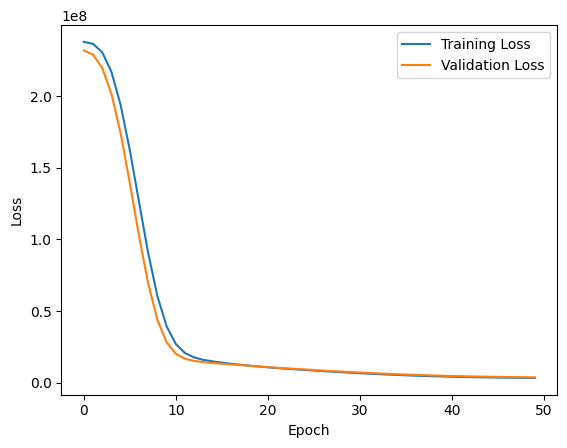

In [267]:
import matplotlib.pyplot as plt

# Plot training history (loss only)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [269]:
predictions = model.predict(X_scaled)
customer_summary['Cluster'] = np.argmax(predictions, axis=-1) + 1  
customer_summary.to_csv('Customer_Summary_Clustered.csv', index=False)
customer_summary


130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step


,CustomerID,TotalSpending,OrderFrequency,TotalQuantity,city,AvgBasketSize,Recency,Cluster
0,12347,2783.37,7,1701,Iceland,397.624286,2,3
1,12348,90.20,3,140,Finland,30.066667,249,2
2,12349,939.75,1,511,Italy,939.750000,19,3
3,12350,294.40,1,196,Norway,294.400000,310,2
4,12352,1130.94,7,500,Norway,161.562857,36,3
...,...,...,...,...,...,...,...,...
4141,18280,137.00,1,40,United Kingdom,137.000000,278,2
4142,18281,46.92,1,52,United Kingdom,46.920000,181,2
4143,18282,113.13,2,51,United Kingdom,56.565000,8,3
4144,18283,2002.63,16,1353,United Kingdom,125.164375,4,3


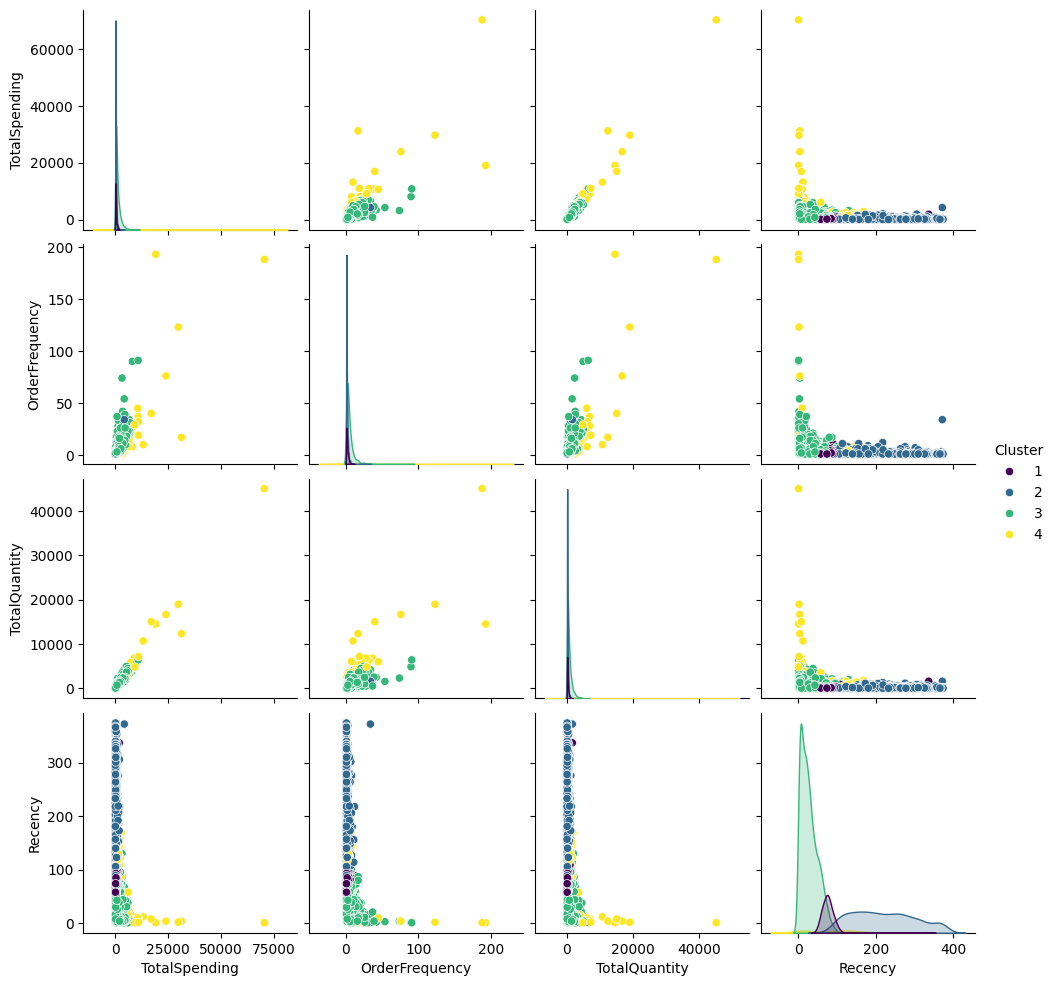

In [271]:
####
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your customer summary data
customer_summary = pd.read_csv('Customer_Summary_Clustered.csv')

# Assuming 'Cluster' column exists in your CSV file
# Create a DataFrame with columns you want to plot against each other
cols_to_plot = ['TotalSpending', 'OrderFrequency', 'TotalQuantity', 'Recency', 'Cluster']
plot_data = customer_summary[cols_to_plot]

# Use pairplot to visualize relationships
sns.pairplot(plot_data, hue='Cluster', palette='viridis')
plt.show()


In [282]:
# Aggregating metrics by cluster
segment_analysis = customer_summary.groupby('Cluster').agg({
    'CustomerID': 'count',
    'TotalSpending': 'mean',
    'OrderFrequency': 'mean',
    'TotalQuantity': 'mean',
    'AvgBasketSize': 'mean',
    'Recency': 'mean'
}).reset_index()

print(segment_analysis)

# Example recommendations based on cluster characteristics
for index, row in segment_analysis.iterrows():
    cluster = row['Cluster']
    count = row['CustomerID']
    spending_mean = row['TotalSpending']
    order_frequency_mean = row['OrderFrequency']
    total_quantity_mean = row['TotalQuantity']
    avg_basket_size_mean = row['AvgBasketSize']
    recency_mean = row['Recency']
    
    print(f"\nCluster {cluster}:")
    print(f"Number of customers: {count}")
    print(f"Average Total Spending: {spending_mean:.2f}")
    print(f"Average Order Frequency: {order_frequency_mean:.2f}")
    print(f"Average Total Quantity: {total_quantity_mean:.2f}")
    print(f"Average Avg Basket Size: {avg_basket_size_mean:.2f}")
    print(f"Average Recency (days): {recency_mean:.2f}")
    
    # Add specific recommendations based on cluster characteristics
    if cluster == 1:
        if avg_basket_size_mean > 100:
            print("Customers in this cluster have a high average basket size. Consider offering bundles or discounts on larger purchases.")
        if recency_mean < 30:
            print("Recent buyers in this cluster. Engage with personalized offers to encourage repeat purchases.")
    elif cluster == 2:
        if spending_mean < 500:
            print("Lower spending customers. Implement targeted promotions or discounts to increase average spending per customer.")
        if order_frequency_mean < 5:
            print("Customers in this cluster purchase infrequently. Develop strategies to increase engagement and frequency of purchases.")
    elif cluster == 3:
        if spending_mean < 100:
            print("Customers in this cluster have low spending habits. Offer entry-level products or services to attract and retain customers.")
        if recency_mean > 90:
            print("Inactive customers in this cluster. Implement reactivation campaigns or incentives to bring them back.")
    else:
        print("Cluster characteristics undefined. Further analysis may be needed.")


   Cluster  CustomerID  TotalSpending  OrderFrequency  TotalQuantity  \
0        1         340     306.446182        2.005882     202.000000   
1        2        1302     267.084501        1.672043     168.559140   
2        3        2412    1074.869325        5.059287     702.278607   
3        4          92    5011.652076       12.858696    3281.891304   

   AvgBasketSize     Recency  
0     159.039740   76.214706  
1     167.978212  220.402458  
2     234.380421   27.409204  
3     672.865801   79.804348  

Cluster 1.0:
Number of customers: 340.0
Average Total Spending: 306.45
Average Order Frequency: 2.01
Average Total Quantity: 202.00
Average Avg Basket Size: 159.04
Average Recency (days): 76.21
Customers in this cluster have a high average basket size. Consider offering bundles or discounts on larger purchases.

Cluster 2.0:
Number of customers: 1302.0
Average Total Spending: 267.08
Average Order Frequency: 1.67
Average Total Quantity: 168.56
Average Avg Basket Size: 167.98
Aver

Personalized Marketing Strategies, Product Suggestions, and Communication Methods by Cluster:
              Cluster                               Marketing Strategy  \
0       High Spenders            Exclusive promotions, loyalty rewards   
1     Frequent Buyers  Upselling, cross-selling complementary products   
2    Average Spenders       Incentives, discounts for larger purchases   
3  Inactive Customers       Reactivation campaigns with special offers   

                 Product Suggestions                     Communication Methods  
0         Premium or luxury products          Personalized emails, direct mail  
1  Related or complementary products        Email marketing, SMS notifications  
2  Best-selling or trending products            Social media posts, online ads  
3      Discounted or clearance items  Targeted email campaigns with incentives  


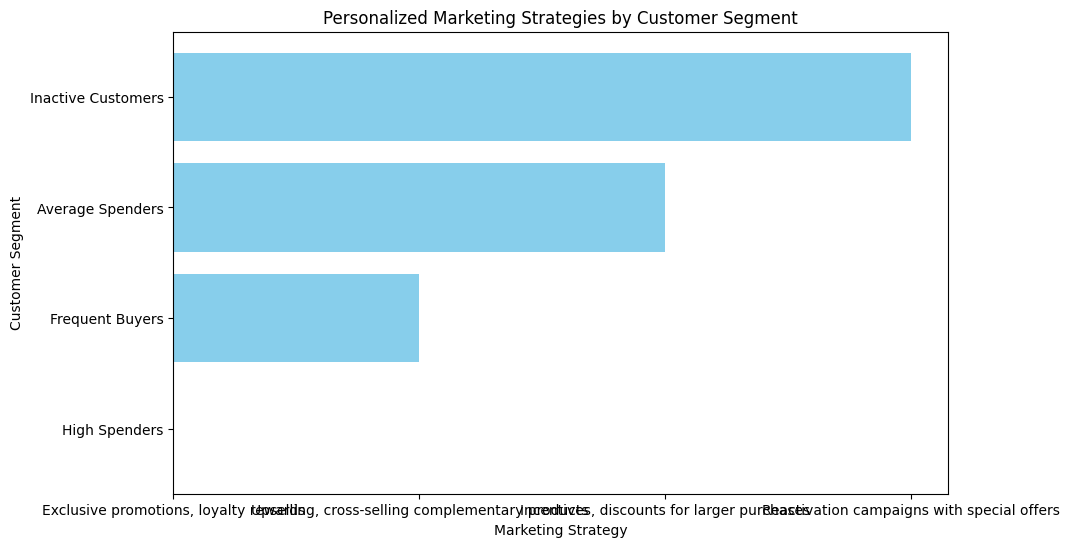

In [277]:
import pandas as pd
import matplotlib.pyplot as plt

cluster_data = {
    'Cluster': ['High Spenders', 'Frequent Buyers', 'Average Spenders', 'Inactive Customers'],
    'Marketing Strategy': [
        'Exclusive promotions, loyalty rewards',
        'Upselling, cross-selling complementary products',
        'Incentives, discounts for larger purchases',
        'Reactivation campaigns with special offers'
    ],
    'Product Suggestions': [
        'Premium or luxury products',
        'Related or complementary products',
        'Best-selling or trending products',
        'Discounted or clearance items'
    ],
    'Communication Methods': [
        'Personalized emails, direct mail',
        'Email marketing, SMS notifications',
        'Social media posts, online ads',
        'Targeted email campaigns with incentives'
    ]
}

# Create DataFrame
df = pd.DataFrame(cluster_data)

# Display personalized marketing strategies, product suggestions, and communication methods
print("Personalized Marketing Strategies, Product Suggestions, and Communication Methods by Cluster:")
print(df)

# Plotting marketing strategies
plt.figure(figsize=(10, 6))
plt.barh(df['Cluster'], df['Marketing Strategy'], color='skyblue')
plt.xlabel('Marketing Strategy')
plt.ylabel('Customer Segment')
plt.title('Personalized Marketing Strategies by Customer Segment')
plt.show()


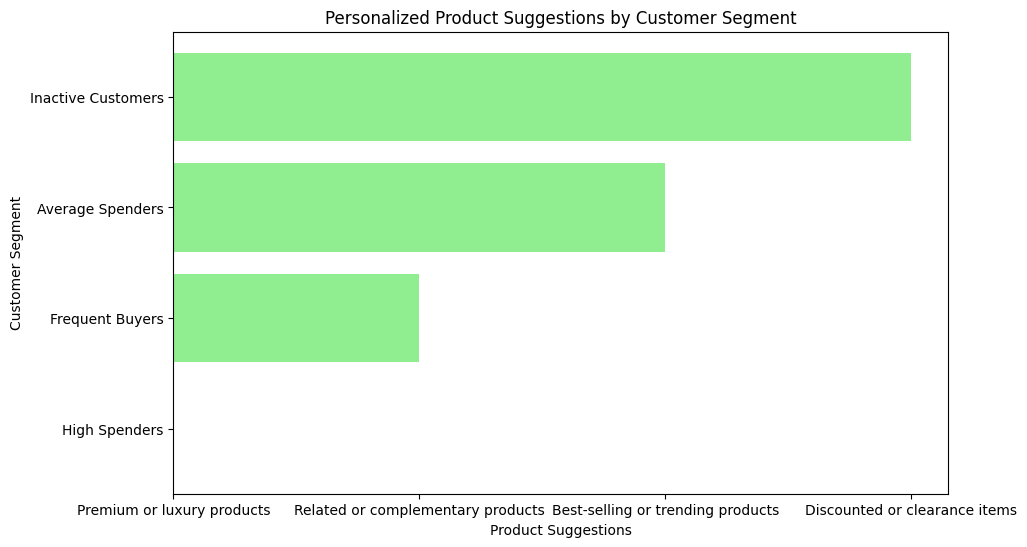

In [183]:
plt.figure(figsize=(10, 6))
plt.barh(df['Cluster'], df['Product Suggestions'], color='lightgreen')
plt.xlabel('Product Suggestions')
plt.ylabel('Customer Segment')
plt.title('Personalized Product Suggestions by Customer Segment')
plt.show()

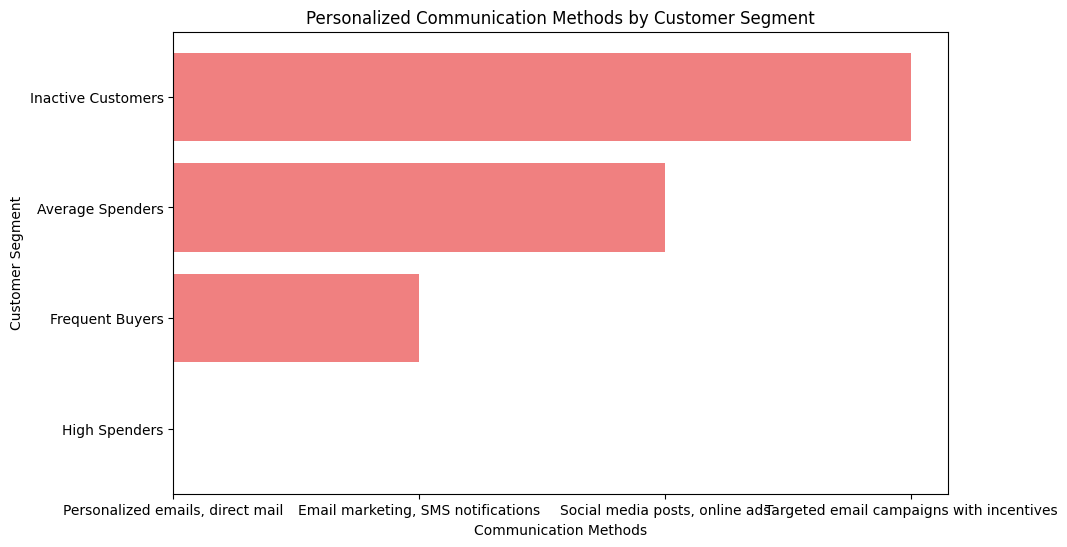

In [185]:
plt.figure(figsize=(10, 6))
plt.barh(df['Cluster'], df['Communication Methods'], color='lightcoral')
plt.xlabel('Communication Methods')
plt.ylabel('Customer Segment')
plt.title('Personalized Communication Methods by Customer Segment')
plt.show()



Customer Segments Analysis:
   CustomerID             Segment  TotalSpending  OrderFrequency  Recency
0           1       High Spenders           5000              10       30
1           2     Frequent Buyers           3000              20       15
2           3    Average Spenders           1000               5       60
3           4  Inactive Customers              0               0       90


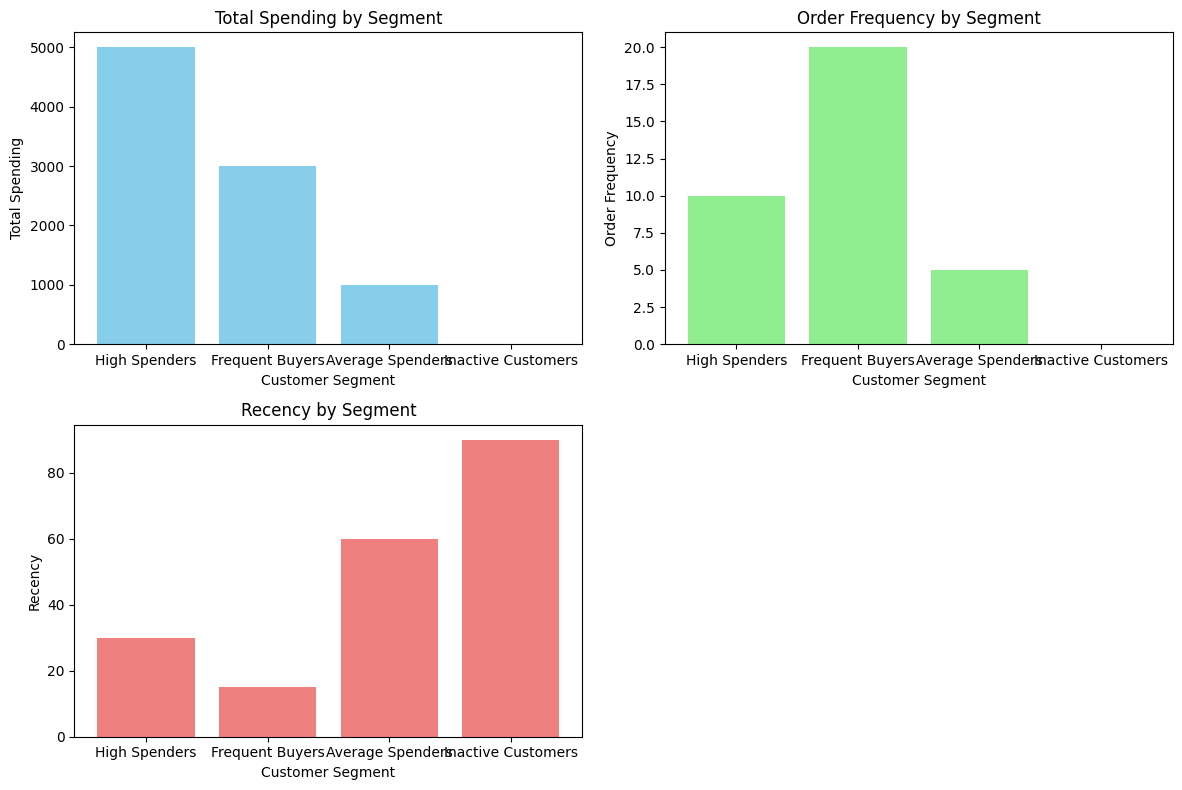


Implications for E-commerce Business:
Targeted Marketing: Tailor marketing strategies based on segment characteristics.
Customer Retention Strategies: Implement personalized retention campaigns.
Inventory Management: Optimize inventory based on segment preferences.

Continuous Optimization:
Monitor and Adjust: Regularly assess and refine segmentation strategies.
Experimentation: Experiment with different marketing initiatives and offers.
Feedback Loop: Gather customer feedback to improve strategies.

Insights and Recommendations:
Segment-Specific Strategies: Develop tailored campaigns for each segment.
Dynamic Adaptation: Adjust strategies based on evolving customer behavior.
Customer-Centric Approach: Prioritize personalized experiences for customers.


In [187]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample customer segmentation data (replace with actual data)
customer_segments = {
    'CustomerID': [1, 2, 3, 4],
    'Segment': ['High Spenders', 'Frequent Buyers', 'Average Spenders', 'Inactive Customers'],
    'TotalSpending': [5000, 3000, 1000, 0],
    'OrderFrequency': [10, 20, 5, 0],
    'Recency': [30, 15, 60, 90]
}

# Create DataFrame
df_segments = pd.DataFrame(customer_segments)

# 10. Interpretation and Insights
# Customer Segments Analysis
print("Customer Segments Analysis:")
print(df_segments)

# Plotting customer segments characteristics
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.bar(df_segments['Segment'], df_segments['TotalSpending'], color='skyblue')
plt.title('Total Spending by Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Total Spending')

plt.subplot(2, 2, 2)
plt.bar(df_segments['Segment'], df_segments['OrderFrequency'], color='lightgreen')
plt.title('Order Frequency by Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Order Frequency')

plt.subplot(2, 2, 3)
plt.bar(df_segments['Segment'], df_segments['Recency'], color='lightcoral')
plt.title('Recency by Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

# Implications for E-commerce Business
print("\nImplications for E-commerce Business:")
print("Targeted Marketing: Tailor marketing strategies based on segment characteristics.")
print("Customer Retention Strategies: Implement personalized retention campaigns.")
print("Inventory Management: Optimize inventory based on segment preferences.")

# Continuous Optimization
print("\nContinuous Optimization:")
print("Monitor and Adjust: Regularly assess and refine segmentation strategies.")
print("Experimentation: Experiment with different marketing initiatives and offers.")
print("Feedback Loop: Gather customer feedback to improve strategies.")

# Insights and Recommendations
print("\nInsights and Recommendations:")
print("Segment-Specific Strategies: Develop tailored campaigns for each segment.")
print("Dynamic Adaptation: Adjust strategies based on evolving customer behavior.")
print("Customer-Centric Approach: Prioritize personalized experiences for customers.")

